Pozn.: třídění podle 655_a naprd, zesofistikovatět.

In [58]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
from src.pocet_stran import pocet_stran
import pandas as pd
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 500)

In [59]:
df = pd.read_parquet(os.path.join("data","cnb_vyber.parquet"))
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [111]:
df.sample(40).sort_values(by="rok")

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20172962080,171212s1914 xr e 000 p cze,None,None,[(Brožováno)],None,None,None,None,[821.162.3-1],[Česká poezie],"[821.162.3-1, (0:82-141)]",[aut],jk01122483,"Šanda, Jan Nepomuk,",1889-1969,None,Syn člověka /,básně Jana Šandy,None,None,None,None,None,None,None,None,None,None,None,[V Chotovinách u Tábora :],"[nákladem vlastním,]",[1914],[1],[39 stran ;],None,[23 cm],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[česká poezie, náboženská poezie]",None,None,None,None,None,None,None,None,None,[Jan Šanda],None,nam a22 i 4500,1914.0
nos190100267,000131s1920 xr ||| | cze,None,None,[(Brožováno)],None,None,None,None,None,None,None,None,None,None,None,None,Adresář obchodníků a živnostníků v Přerově,None,None,None,None,None,None,None,None,None,None,None,None,[V Přerově :],"[nákladem vlastním,]",[1920],[1],[32 stran ;],None,[28 cm],None,None,"[Název z obálky, Vročení z předmluvy]",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 1i 4500,1920.0
cpk20011004000,010803s1920 xr e 100 0 cze,None,None,[(Brož.)],None,None,None,None,[69],[Stavebnictví],"[69, (062.534)]",None,None,None,None,None,"Památník I. sjezdu československých stavitelů,...",None,None,None,None,None,None,[Praha :],"[nákladem sjezdovým,]",[[1920 nebo 1921]],None,[(Ant. Reis)],None,None,None,None,None,[151 s. ;],None,[24 cm],None,None,None,None,None,None,None,None,[stavebnictví],None,None,[Československo],None,None,[sborníky konferencí],None,None,None,None,None,None,None,None,None,None,None,nam a22 a 4500,1920.0
bk193100763,990817s1931 xr 000 0 cze,None,None,None,None,None,None,None,[003],[Systémy psaní a písma. Sémiotika (obecně)],"[003(091), 003.3.076]",[aut],jk01030270,"Dyrynk, Karel,",1876-1949,None,Ležaté písmo čili kursiva-italka :,napsal Karel Dyrynk ; [první zkušební otisk pí...,None,None,None,None,None,[Praha :],"[[s.n.],]",[1931],[(Praha :],[Státní tiskárna)],None,None,None,None,None,[29 s. :],[ukázky písma ;],[20 cm],None,None,"[Bibliofilie, 30 výt., Zkušební tisk Kursivy I...",None,None,None,None,None,"[dějiny písma, kurzíva]","[None, dějiny]",None,None,None,None,[studie],None,None,None,None,None,None,None,None,None,None,None,nam a22 a 4500,1931.0
bk193202915,990813s1931 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],jk01092173,"Pavlovský, František V.,",1881-,None,Technická příručka /,Ing. F.V. Pavlovský,None,None,None,[II. vydání],None,[Praha :],"[Vydavatelství odborných časopisů J. Hložek,]",[1931],None,[(Dr. Ed. Grégr a syn)],None,None,None,None,None,[372 s. ;],None,[8°],"[[Knihovna časopisů ""Železo"" ;]",[Sv. I]],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Knihovna časopisu Železo],None,None,nam a22 1 4500,1931.0
bknjrr00240,031106s1934 xr cze,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Program záchrany malozemědělského a selského l...,None,None,None,None,None,None,[Malenovice :],"[V. Mikulíček,]",[[1934]],None,None,None,None,None,None,None,[62 s. ;],None,[12°],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,1934.0
bk193602095,990309s1936 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],jk01062799,"Král, Saša,",1892-,None,Přípravy pro vyučování dějepisu a zeměpisu v 6...,"Kalivoda, Sadecký ; Přehlédl R. Bačkovský ...",None,None,None,None,None,[V Praze :],"[Československá grafická Unie,]",[1936],N

<Axes: xlabel='rok'>

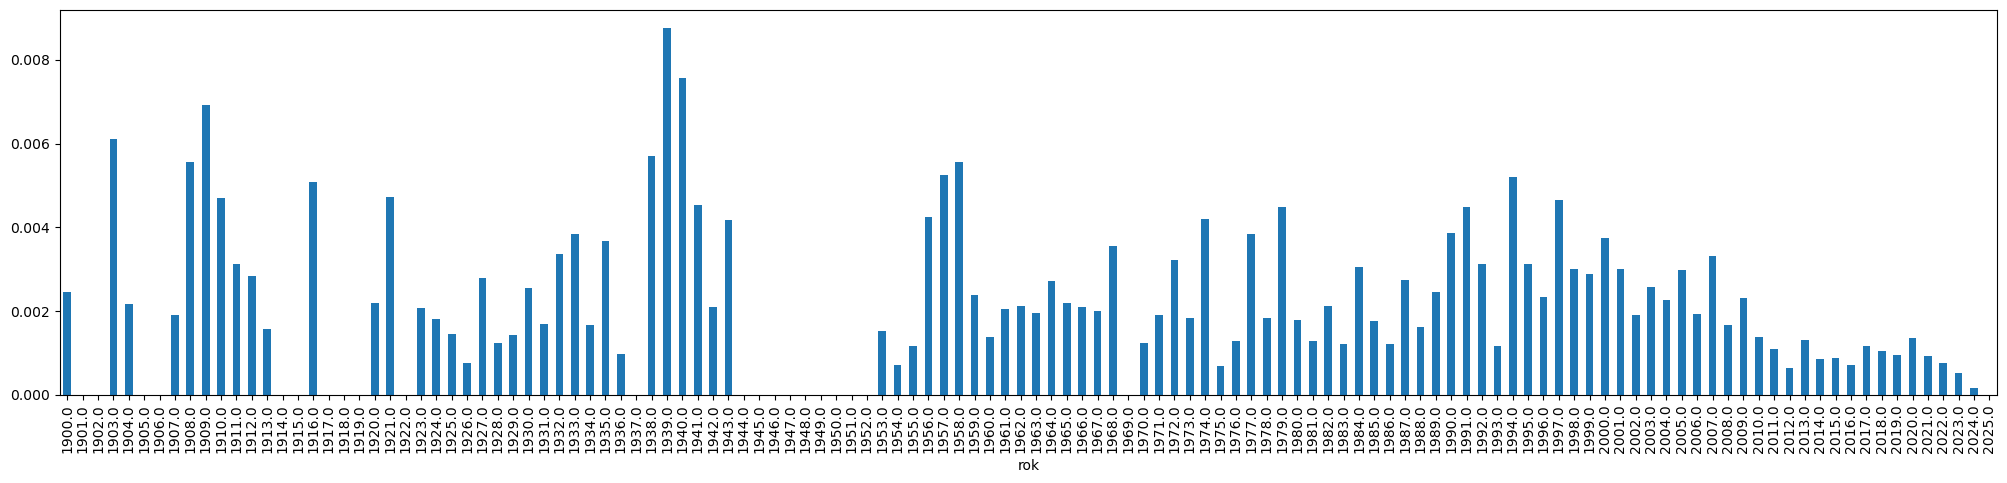

In [106]:
(df[df['072_x'].astype(str).str.lower().str.contains('němčina',na=False)].groupby('rok').size() / df[df['072_x'].notnull()].groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

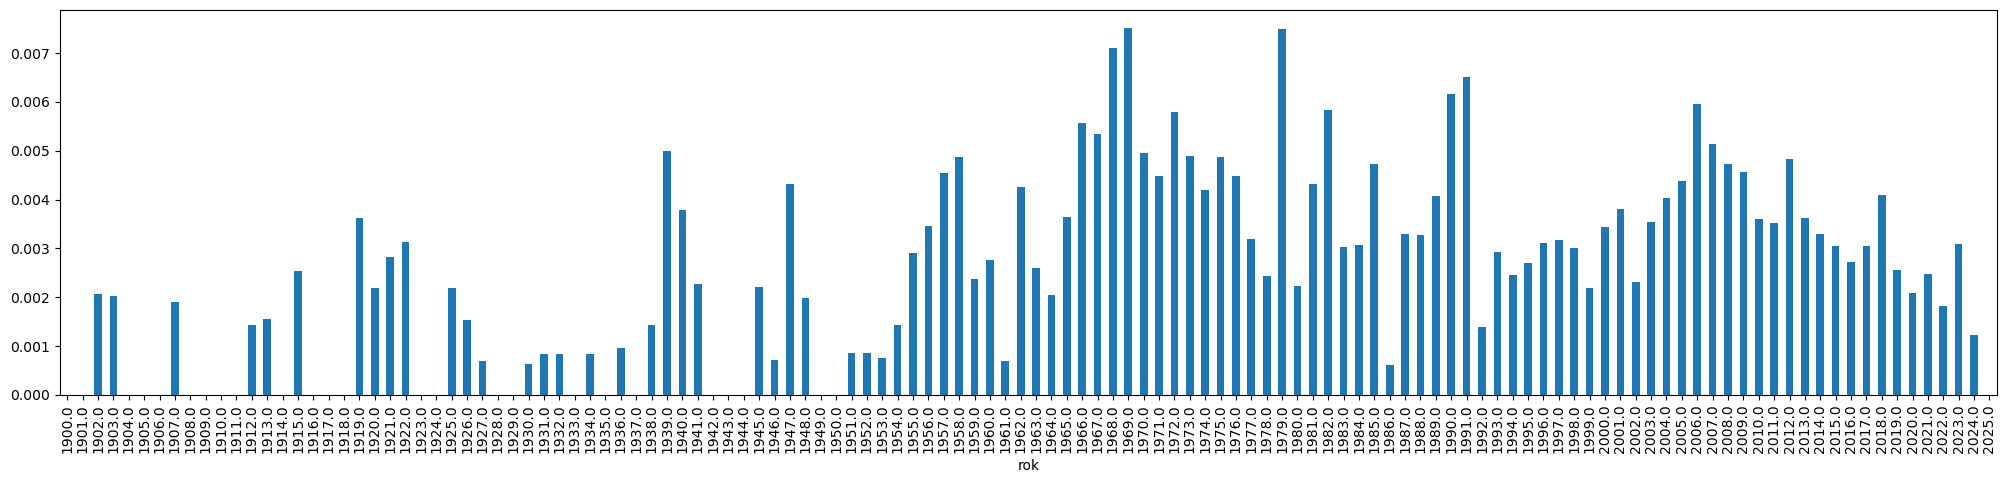

In [105]:
(df[df['072_x'].astype(str).str.lower().str.contains('angličtina',na=False)].groupby('rok').size() / df[df['072_x'].notnull()].groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

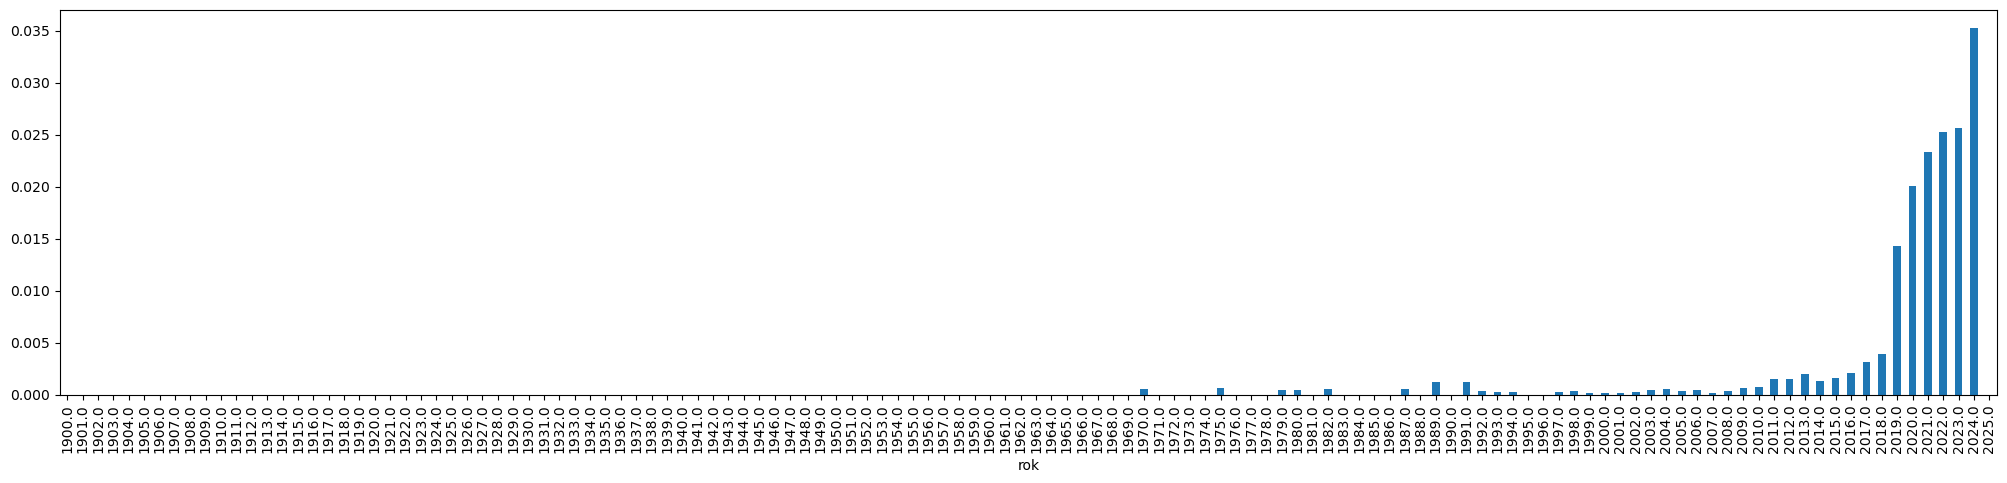

In [99]:
(df[df['072_x'].astype(str).str.lower().str.contains('komiks',na=False)].groupby('rok').size() / df[df['072_x'].notnull()].groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

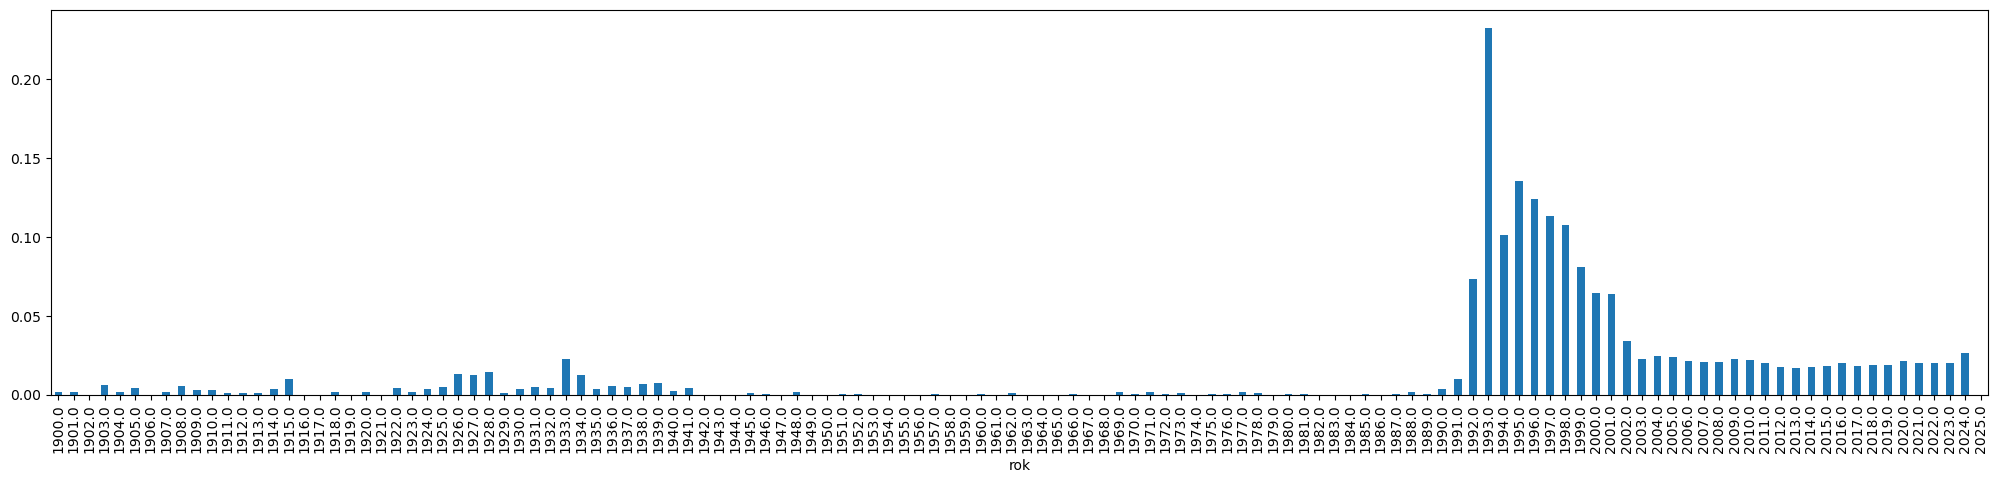

In [100]:
(df[df['072_x'].astype(str).str.lower().str.contains('fantastická próza',na=False)].groupby('rok').size() / df[df['072_x'].notnull()].groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

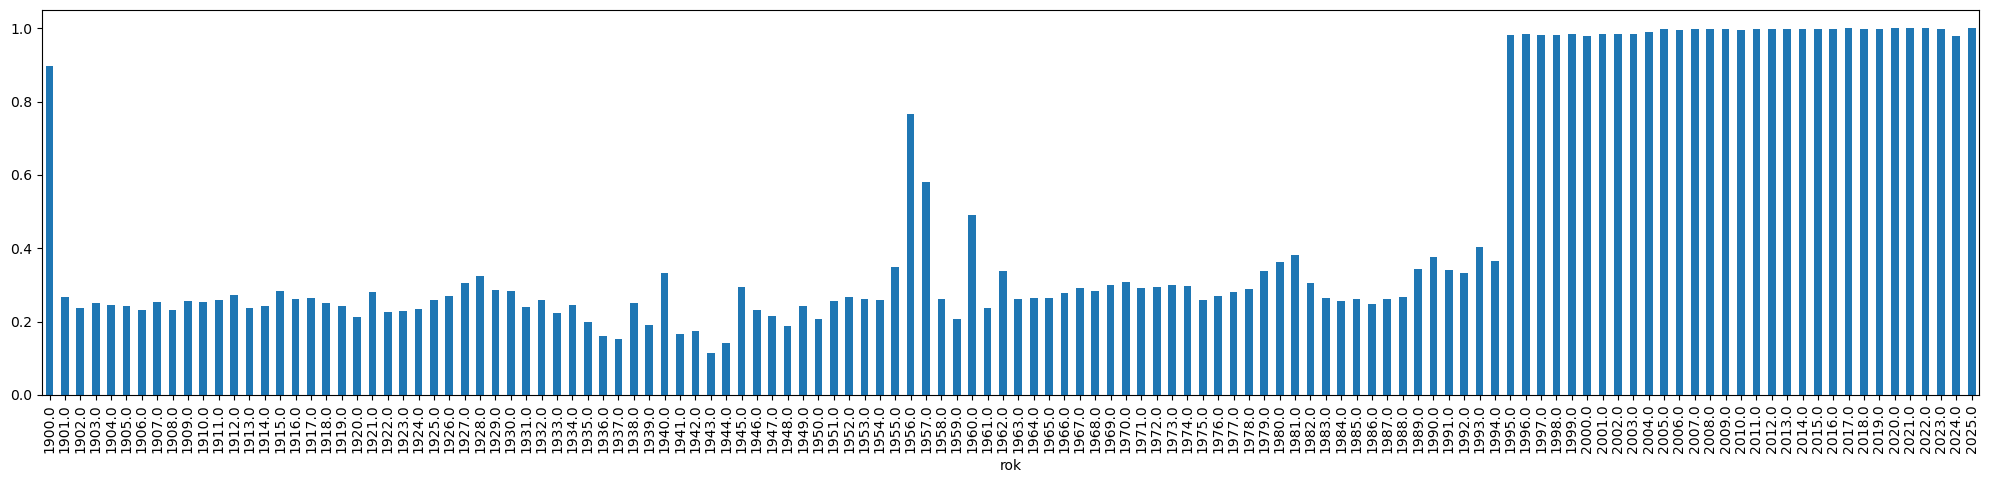

In [101]:
(df[df['072_x'].notnull()].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [60]:
def hledej_245(retezec):
    return df[df['245_a'].str.contains(retezec, na=False)].groupby('rok').size() / df.groupby('rok').size()

<Axes: xlabel='rok'>

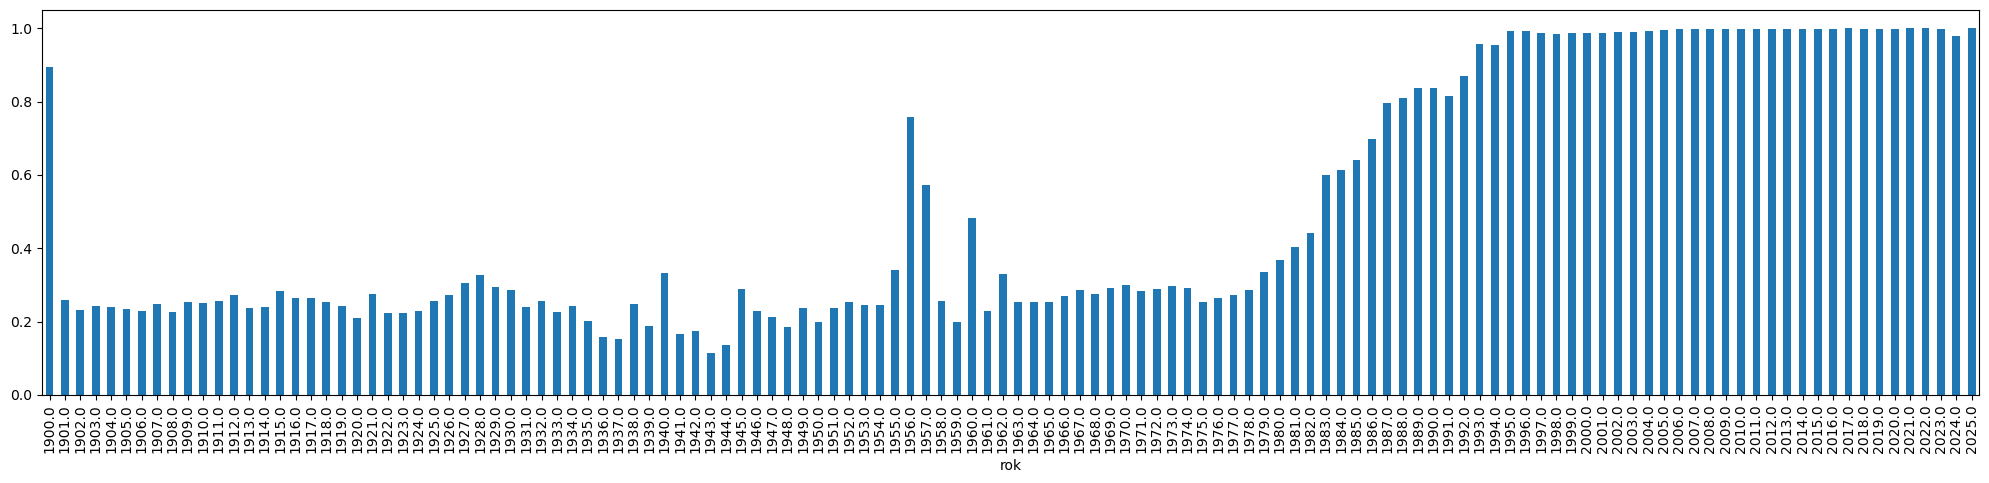

In [61]:
(df[df['655_a'].notnull()].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [73]:
romany = df[df['655_a'].astype(str).str.contains("román", na=False)]

<Axes: xlabel='rok'>

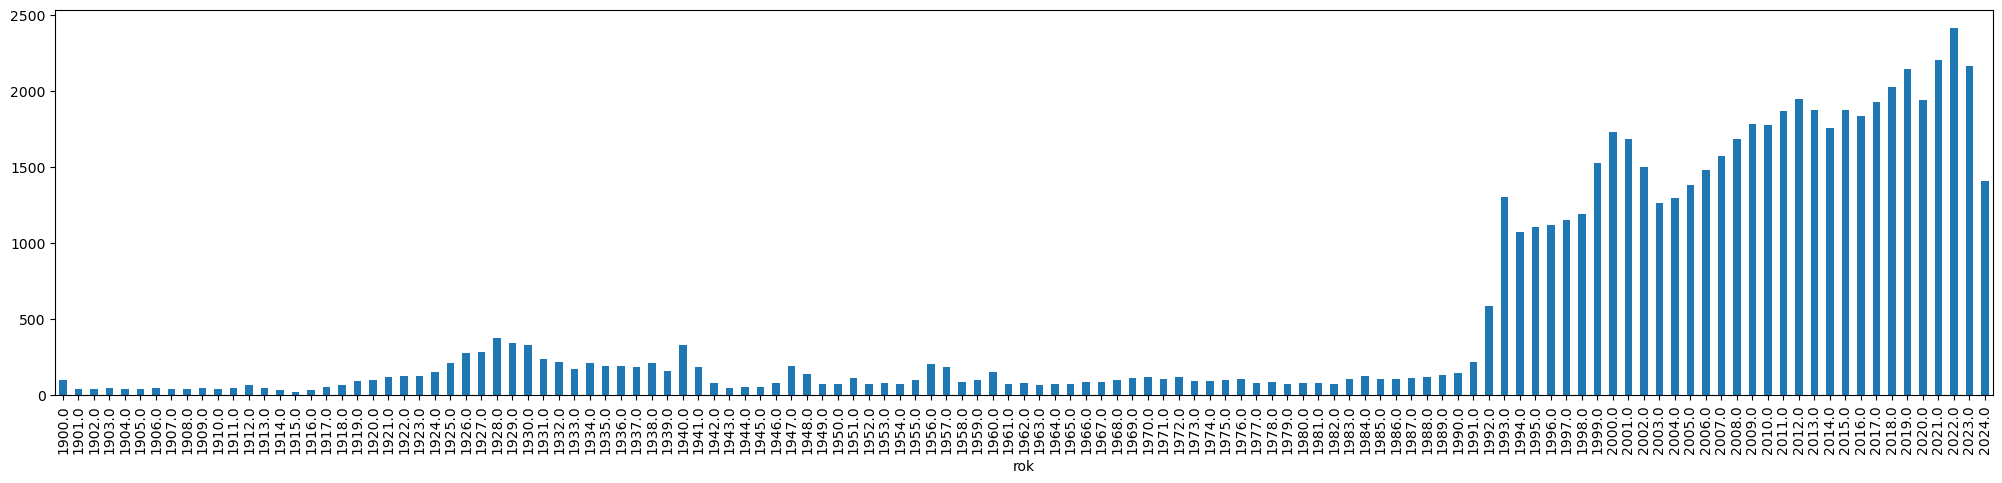

In [86]:
romany.groupby("rok").size().plot.bar(figsize=(25,5))

In [75]:
def romany_655(retezec):
    return romany[romany['655_a'].astype(str).str.contains(retezec, na=False)].groupby('rok').size() / romany.groupby('rok').size()

<Axes: xlabel='rok'>

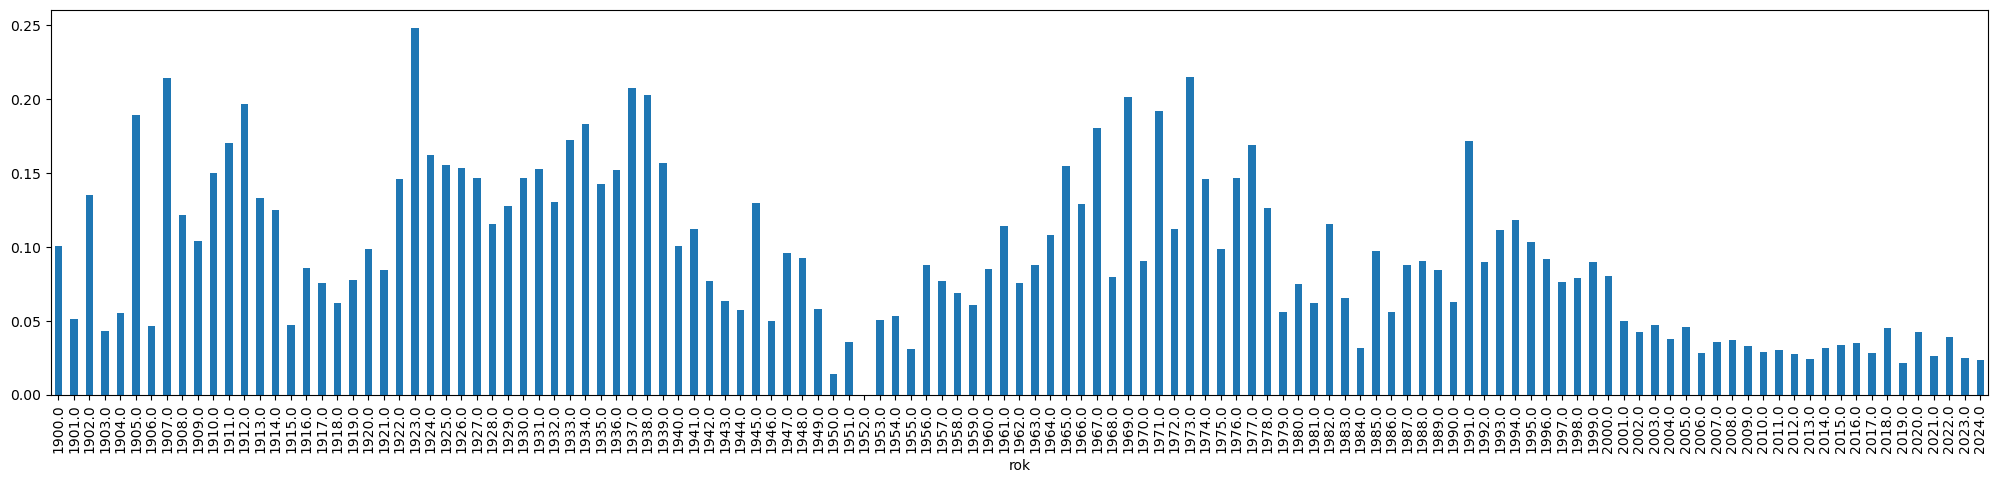

In [76]:
romany_655('dobrodružné').plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

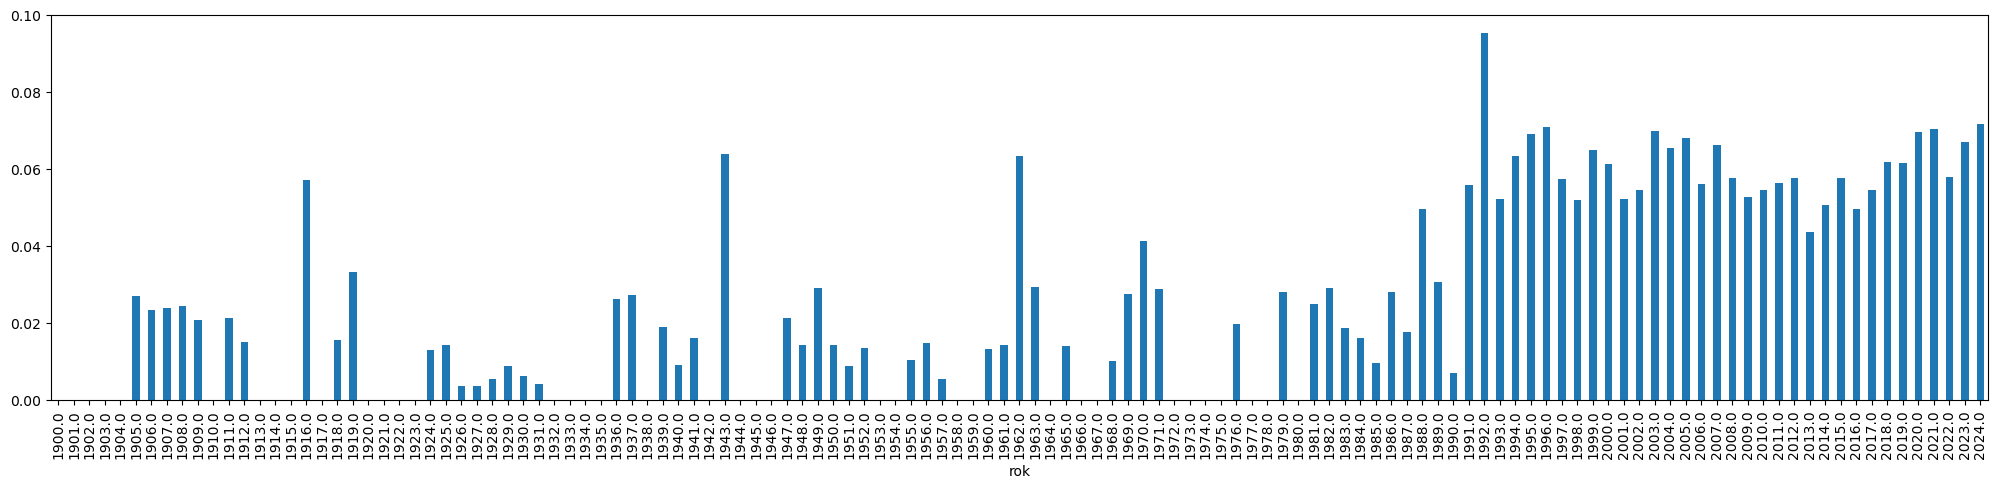

In [77]:
romany_655('vědecko-fantastické').plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

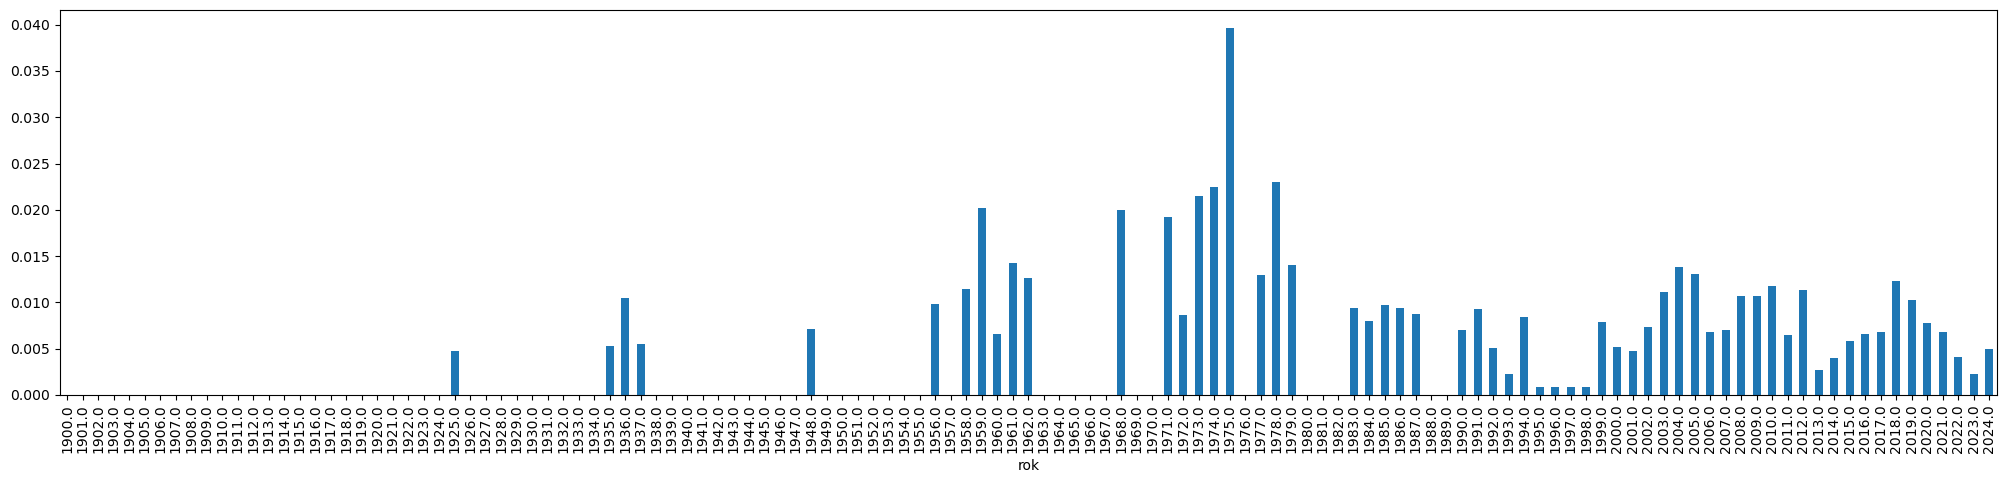

In [79]:
romany_655('špionážní').plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

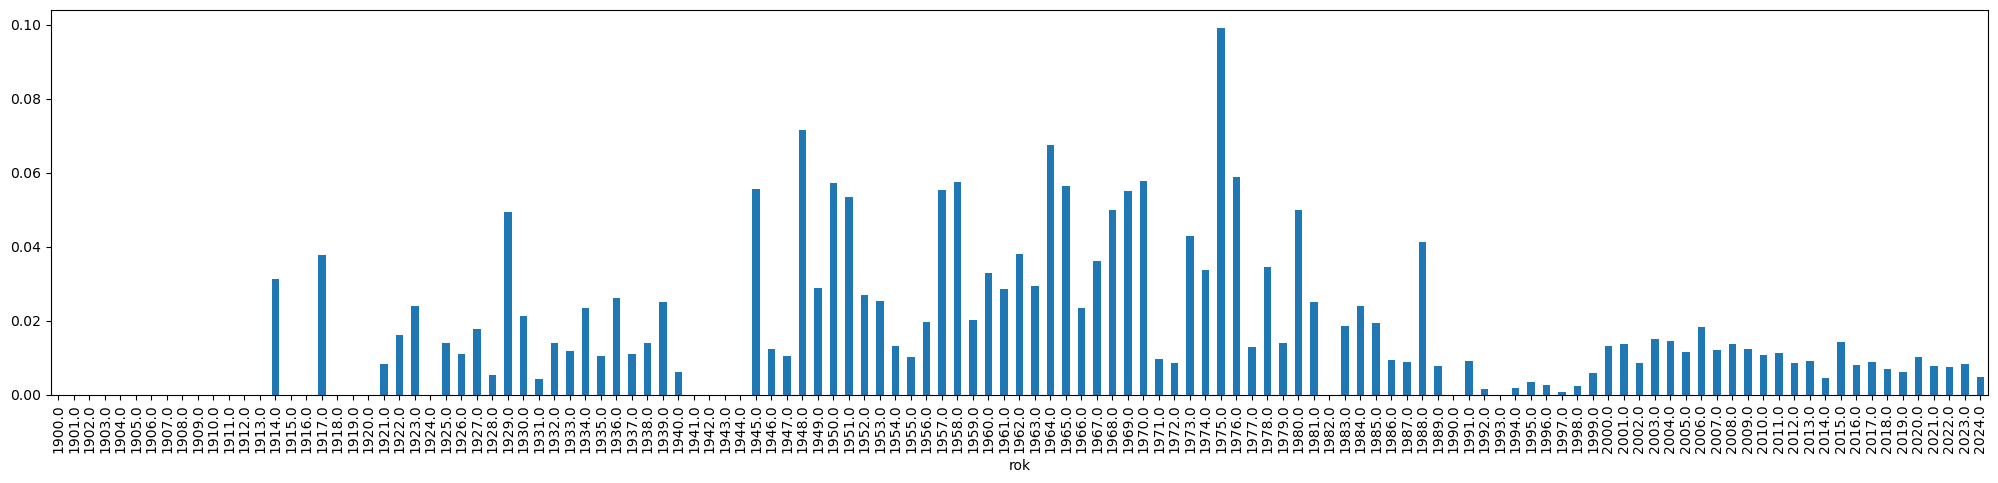

In [81]:
romany_655('válečné').plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

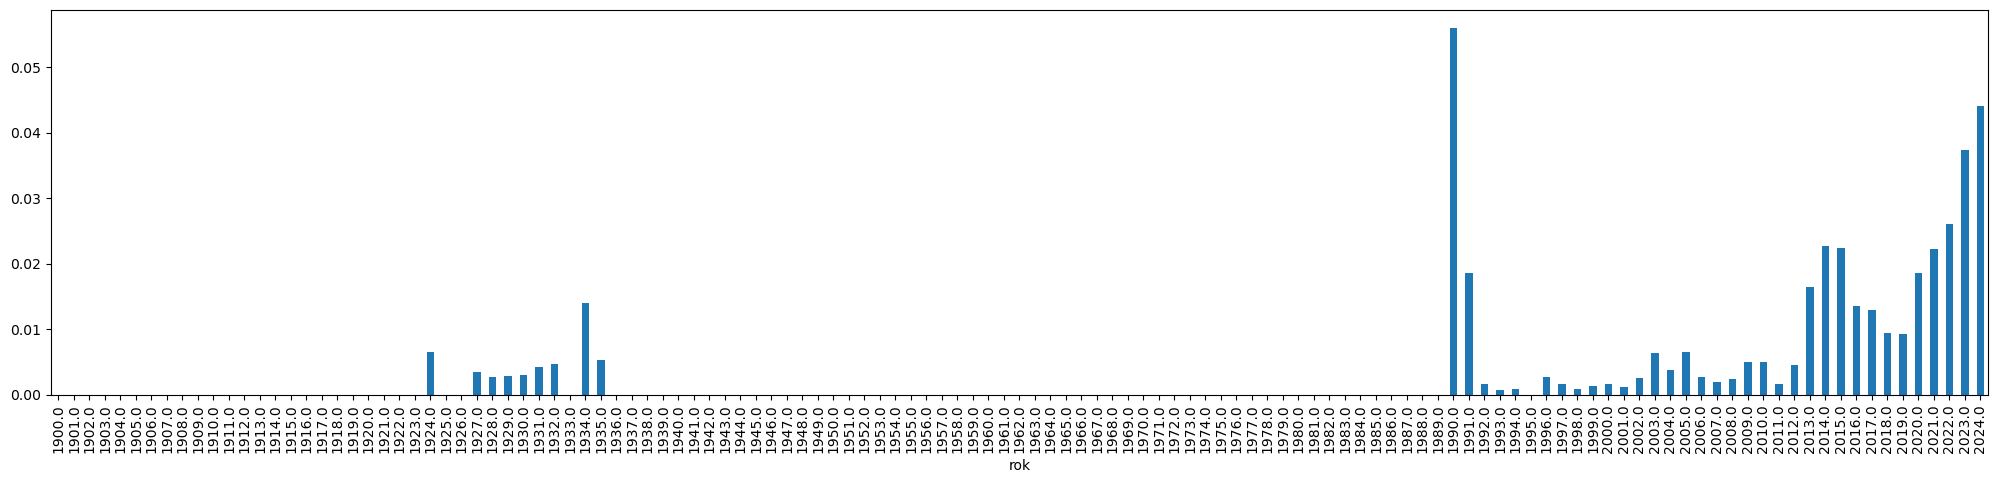

In [113]:
romany_655('erotické romány').plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

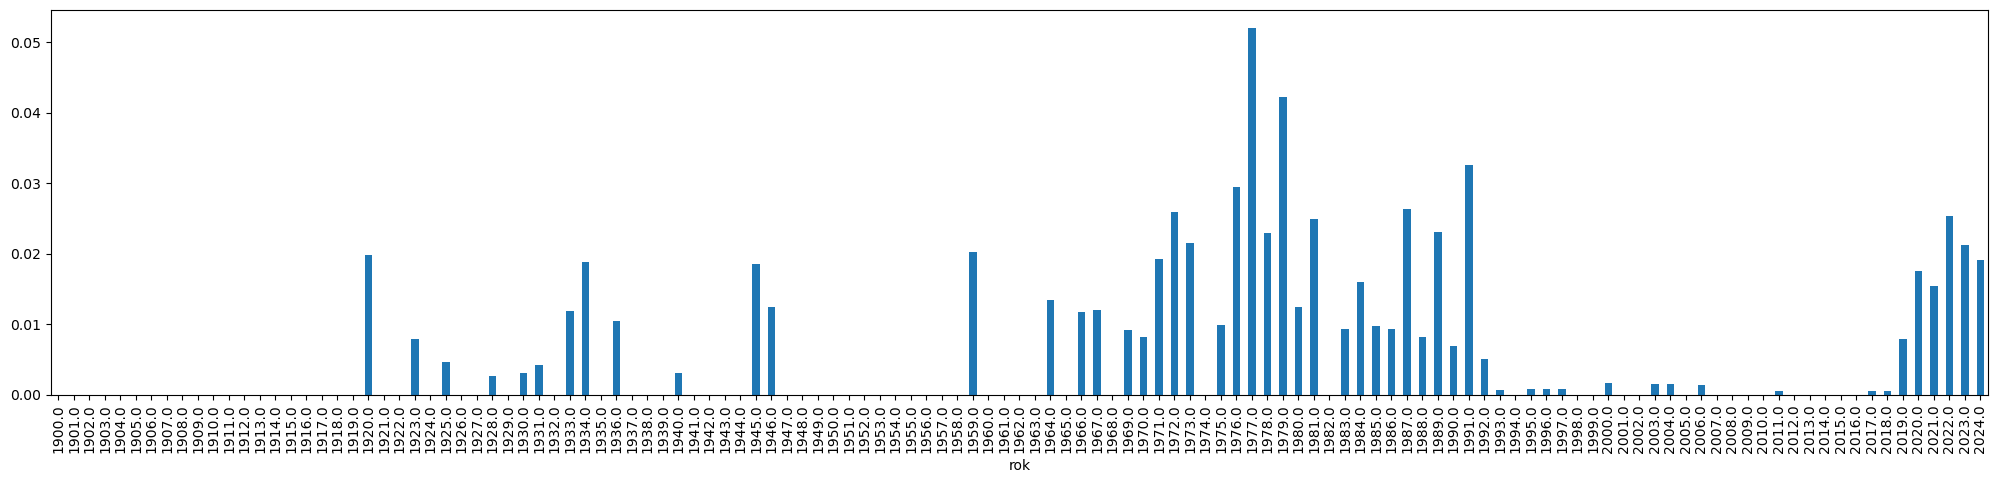

In [114]:
romany_655('dívčí romány').plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

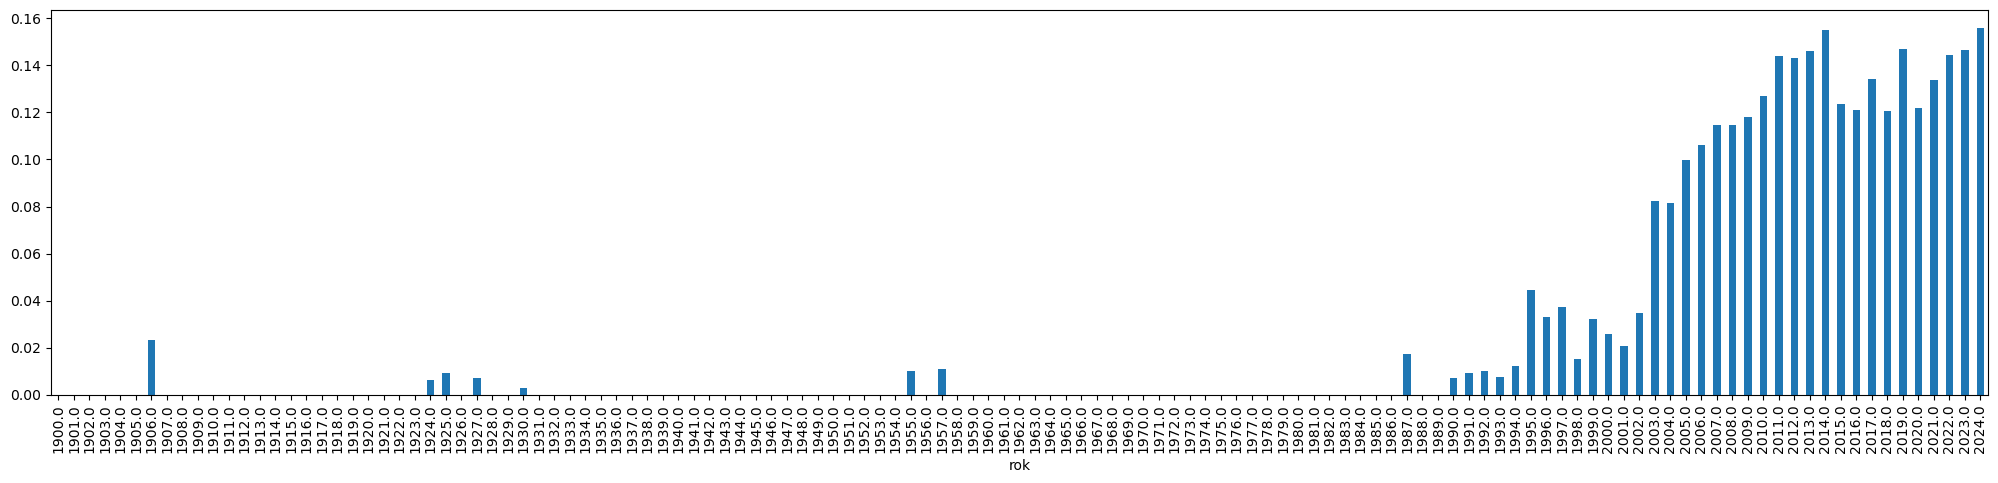

In [115]:
romany_655('fantasy romány').plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

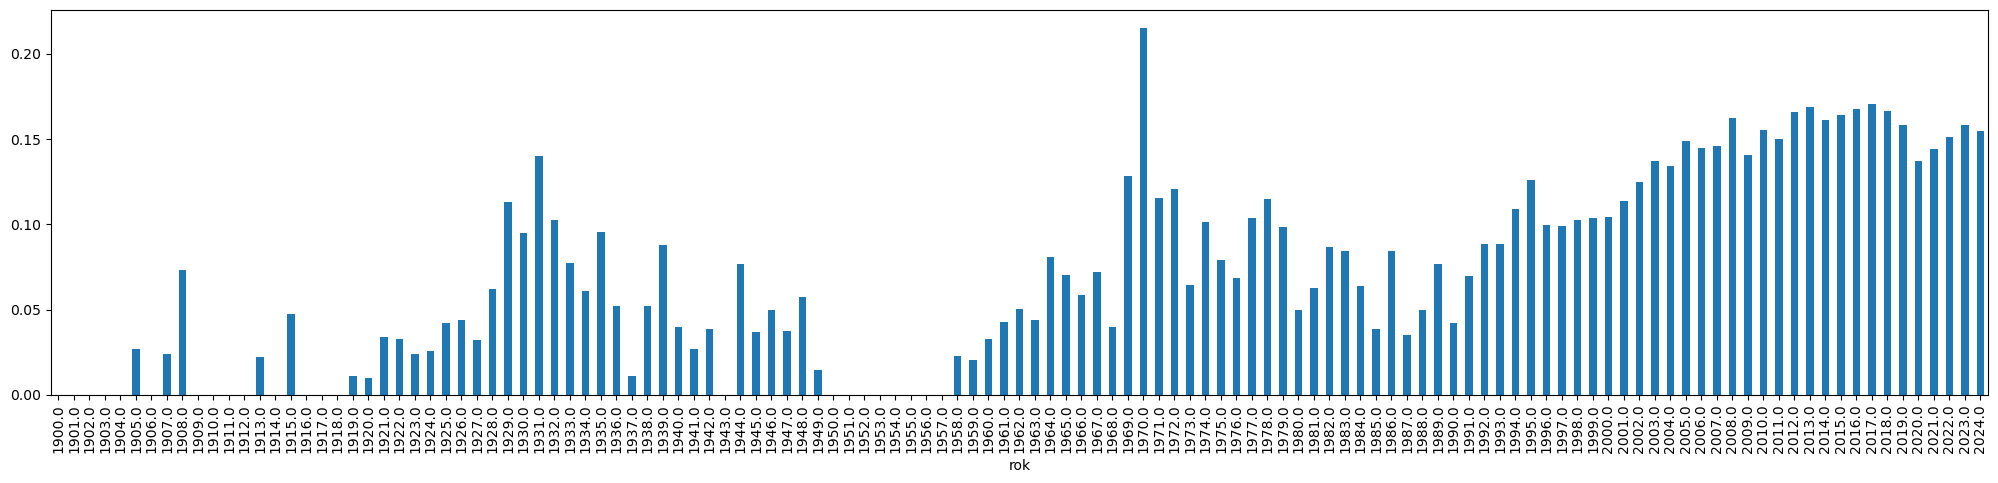

In [119]:
romany_655('detektivní romány').plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

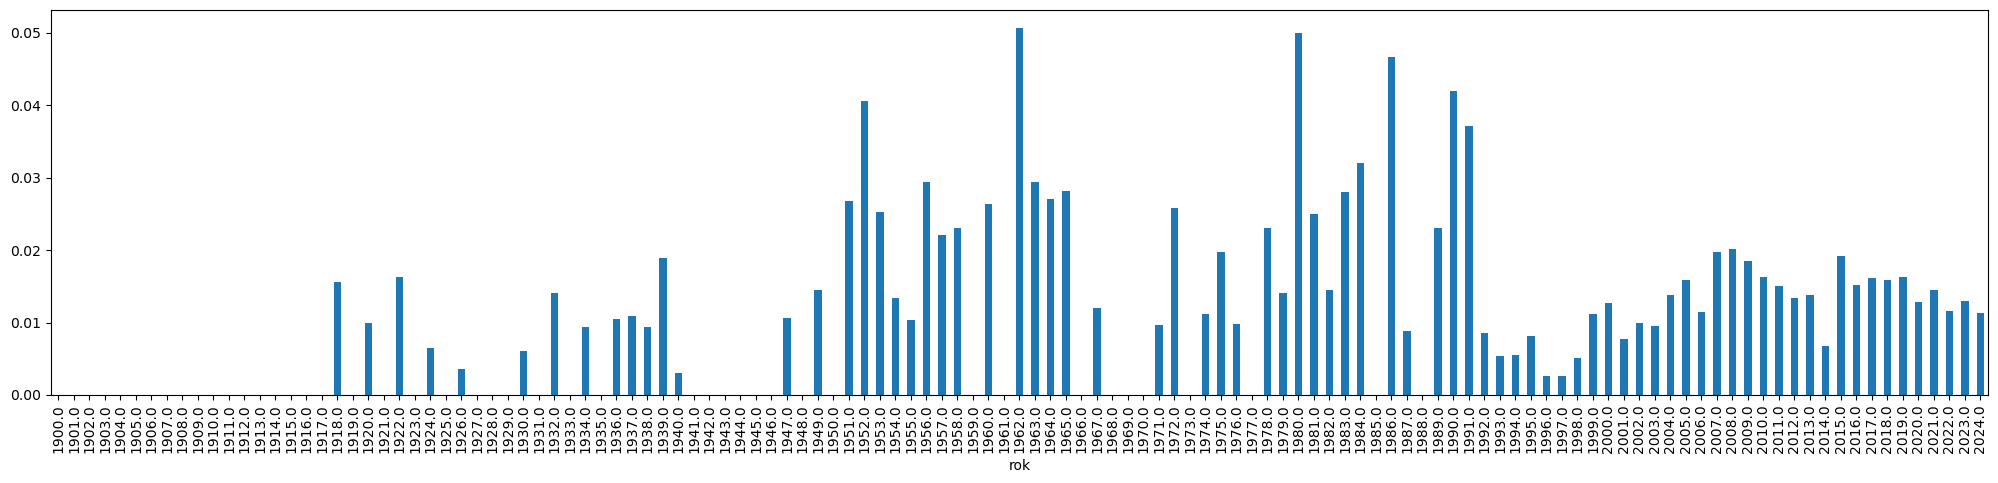

In [131]:
romany_655('autobiografické romány').plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

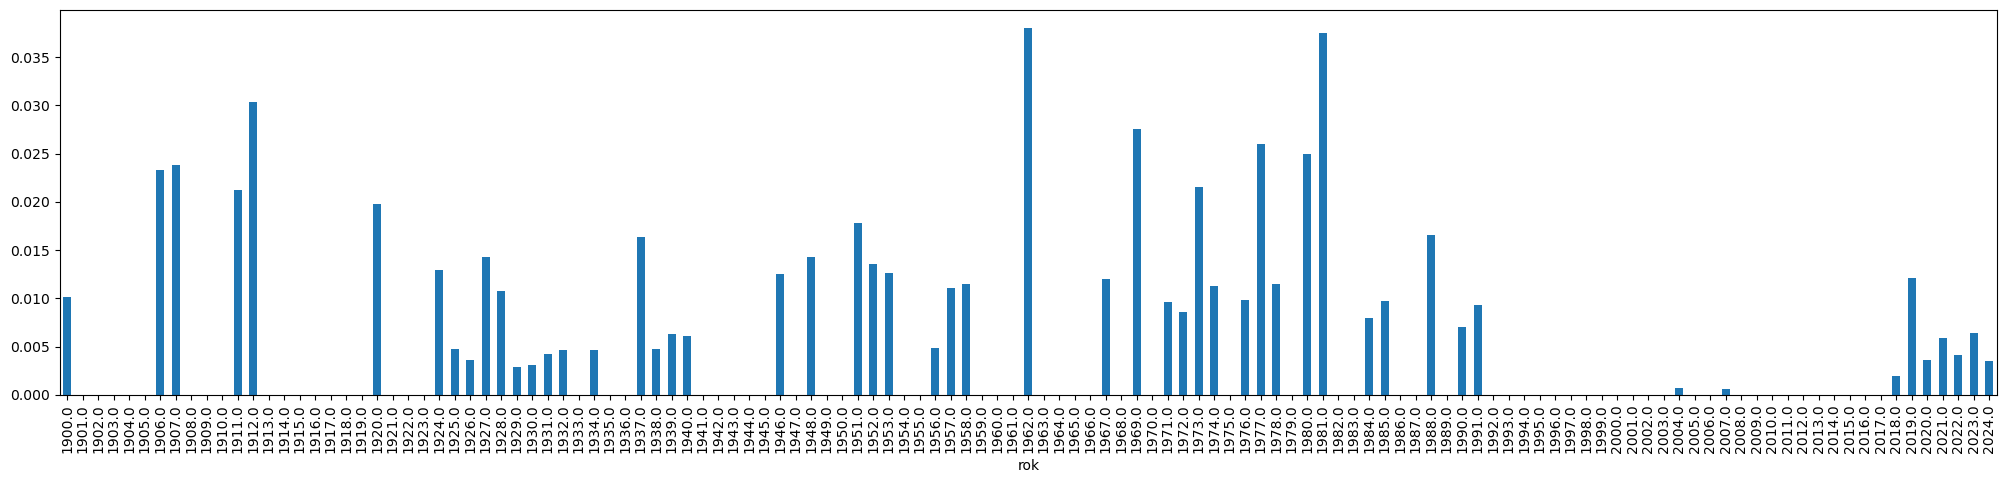

In [120]:
romany_655('společenské romány').plot.bar(figsize=(25,5))

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
C:\Users\micha\AppData\Local\Temp\ipykernel_35808\3530878240.py:1: SyntaxWarning: invalid escape sequence '\('
  romany_655('horory \(romány\)').plot.bar(figsize=(25,5))


<Axes: xlabel='rok'>

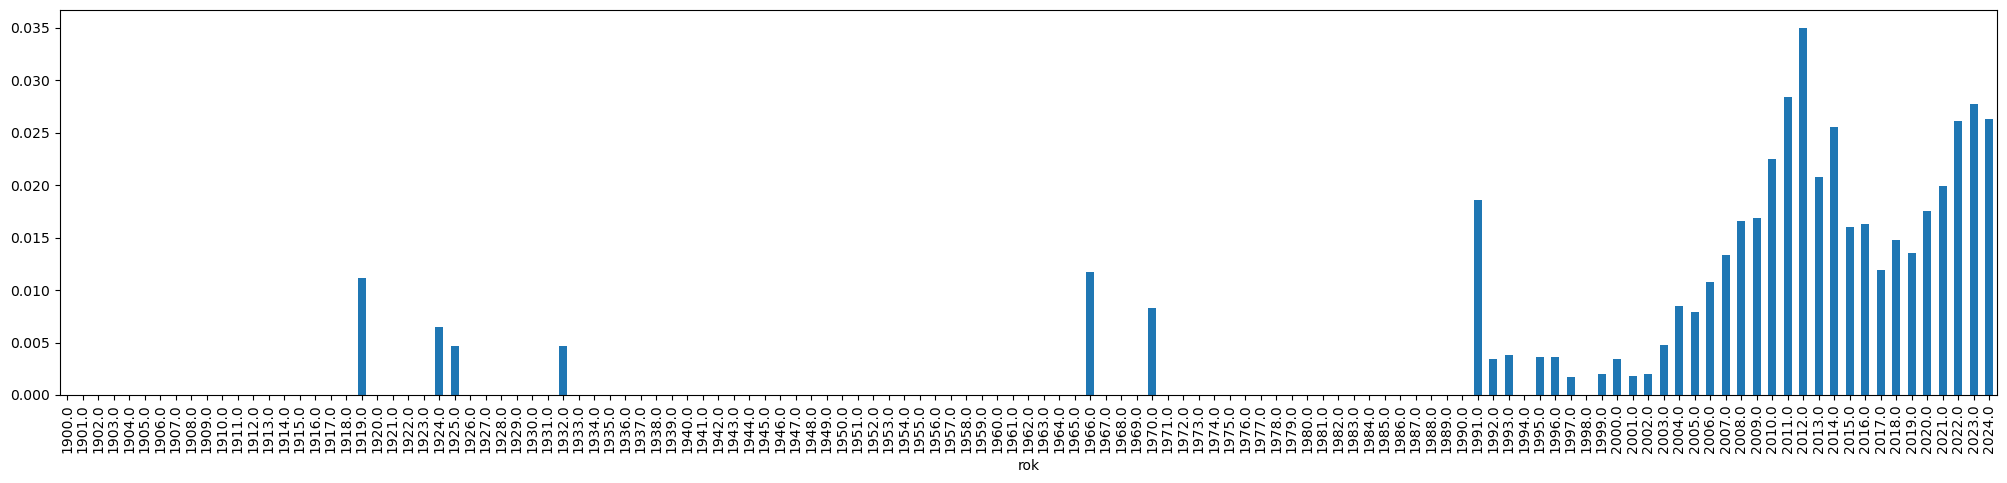

In [129]:
romany_655('horory \(romány\)').plot.bar(figsize=(25,5))

In [135]:
df[df['100_a'].str.contains('Torčík, Marek',na=False)].sort_values(by="rok")

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20172878033,170106s2016 xr a g 000 p cze d,[978-80-7354-171-2],None,"[(Šimon Ryšavý ;, brožováno)]",None,None,None,None,[821.162.3-1],[Česká poezie],"[821.162.3-1, (0:82-1)]",[aut],xx0209774,"Torčík, Marek,",1993-,None,Rhizomy /,Marek Torčík,None,None,None,[Vydání první],None,None,None,None,None,None,None,[Brno :],"[Šimon Ryšavý,]",[2016],[1],[51 stran :],[ilustrace ;],[15 cm],[LSFH ;],[svazek 4],"[""V návaznosti na udělení Zvláštní ceny Klemen...",None,None,None,None,None,None,None,None,None,None,None,"[česká poezie, Czech poetry]",None,None,None,None,[pbl],[mzk2017949385],[Spolek přátel umění města Kunštát],None,[LSFH],None,None,cam a22 i 4500,2016.0
nkc20233563999,231031s2023 xr g 000 f cze,[978-80-7637-399-0],None,[(brožováno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-31)]",[aut],xx0209774,"Torčík, Marek,",1993-,None,Rozložíš paměť /,Marek Torčík,None,None,None,[Vydání první],None,None,None,None,None,None,None,[V Praze :],"[Paseka,]",[2023],[1],[266 stran ;],None,[20 cm],None,None,None,[Křehký debut je unikátním pokusem vnést do če...,[Ve 3:37 probudí hrdinu románu telefon a noční...,None,None,None,None,None,None,None,None,None,"[české romány, Czech fiction]",None,None,None,None,None,None,None,None,None,None,None,nam a22 i 4500,2023.0


In [122]:
kategorie = df.explode('655_a').groupby('655_a').size().index.to_list()

In [123]:
[x for x in kategorie if 'román' in x]

['albánské romány',
 'alžírské romány (francouzsky)',
 'americké romány',
 'amrické romány',
 'anglicky psané romány',
 'anglické romány',
 'angolské romány',
 'antiutopické romány',
 'arabské romány',
 'argentinské romány',
 'arménské romány',
 'australské romány',
 'autobiografické romány',
 'belgické romány',
 'belgické romány (francouzsky)',
 'bengálské romány',
 'biografické romány',
 'bosenské romány',
 'brazilské romány',
 'britské romány',
 'bulharské romány',
 'běloruské romány',
 'cestopisné romány',
 'chilské romány',
 'chorvatské romány',
 'detektivní romány',
 'dobrodružné romány',
 'dokumentární romány',
 'dánské romány',
 'dívčí romány',
 'egyptské romány (arabsky)',
 'ekvádorské romány',
 'erotické romány',
 'esperantské romány',
 'estonské romány',
 'experimentální romány',
 'fantasy romány',
 'filipínské romány (anglicky)',
 'filipínské romány (španělsky)',
 'filozofické romány',
 'finské romány',
 'finské romány (švédsky)',
 'francouzsky psané romány',
 'francouzské 

## Volnočasové

In [ ]:
hledej('sudoku').plot.bar(figsize=(25,5))

In [ ]:
hledej('křížovk').plot.bar(figsize=(25,5))

In [ ]:
hledej('anekdot').plot.bar(figsize=(25,5))

In [ ]:
hledej('vtip').plot.bar(figsize=(25,5))